In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif']=['SimHei']

In [2]:
df=pd.read_csv('hoteldata.csv')

In [3]:
df.head()

,酒店名称,地区,地址,卫生评分,服务评分,设施评分,位置评分,评价数,装修时间,房间类型,房价,经度,纬度,公司,出行住宿,校园生活
0,北京朗丽兹西山花园酒店,海淀区,海淀永丰路与北清路十字路口往南800米路南,4.8,4.8,4.7,4.4,143,2014,豪华套间,9970,116.292419,40.095804,0,0,0
1,北京钓鱼台国宾馆,海淀区,海淀阜成路2号,4.9,4.8,4.8,4.6,9,2013,豪华套间,9888,116.339444,39.928419,28,80,43
2,北京颐和安缦酒店,海淀区,海淀颐和园宫门前街1号,4.7,4.6,4.4,4.4,104,2008,豪华套间,9289,116.288607,40.005692,2,18,5
3,北京华尔道夫胡同四合院,东城区,东城金鱼胡同5-15号,5.0,5.0,4.5,4.5,7,2016,豪华套间,6777,116.420463,39.922276,33,185,35
4,北京颐和安缦酒店,海淀区,海淀颐和园宫门前街1号,4.7,4.6,4.4,4.4,104,2008,商务间,5813,116.288607,40.005692,2,18,5


In [4]:
#将四项评分的平均分作为总体评分
df['总体评分']=(df['卫生评分']+df['服务评分']+df['设施评分']+df['位置评分'])/4
df['装修新旧']=pd.cut(df['装修时间'],[0,2015,2019],labels=['旧装修','新装修'])
df.head()

,酒店名称,地区,地址,卫生评分,服务评分,设施评分,位置评分,评价数,装修时间,房间类型,房价,经度,纬度,公司,出行住宿,校园生活,总体评分,装修新旧
0,北京朗丽兹西山花园酒店,海淀区,海淀永丰路与北清路十字路口往南800米路南,4.8,4.8,4.7,4.4,143,2014,豪华套间,9970,116.292419,40.095804,0,0,0,4.675,旧装修
1,北京钓鱼台国宾馆,海淀区,海淀阜成路2号,4.9,4.8,4.8,4.6,9,2013,豪华套间,9888,116.339444,39.928419,28,80,43,4.775,旧装修
2,北京颐和安缦酒店,海淀区,海淀颐和园宫门前街1号,4.7,4.6,4.4,4.4,104,2008,豪华套间,9289,116.288607,40.005692,2,18,5,4.525,旧装修
3,北京华尔道夫胡同四合院,东城区,东城金鱼胡同5-15号,5.0,5.0,4.5,4.5,7,2016,豪华套间,6777,116.420463,39.922276,33,185,35,4.750,新装修
4,北京颐和安缦酒店,海淀区,海淀颐和园宫门前街1号,4.7,4.6,4.4,4.4,104,2008,商务间,5813,116.288607,40.005692,2,18,5,4.525,旧装修


In [5]:
#描述性统计分析

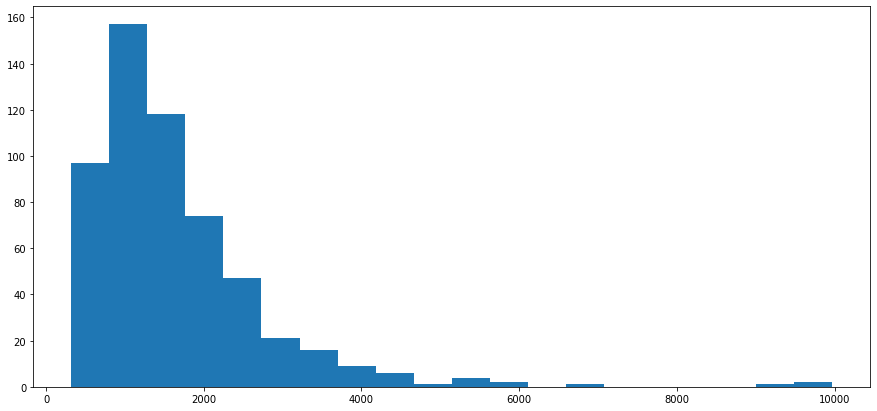

In [8]:
# 酒店房价分布直方图
price=df['房价']
plt.figure('hist',figsize=(15,7))
n,bins,patches=plt.hist(price,bins=20)
plt.show()

In [9]:
# 酒店房价平均值
df['房价'].mean()

1655.5125899280577

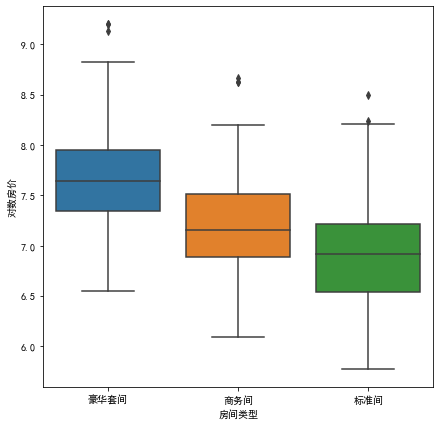

In [16]:
# 酒店因素箱型图
df['对数房价']=np.log(df['房价'])
plt.figure(figsize=(7,7))
sns.boxplot(x='房间类型',y='对数房价',data=df)

#符合一般的房价标准，按照标准间、商务间、豪华套间价格依次递增

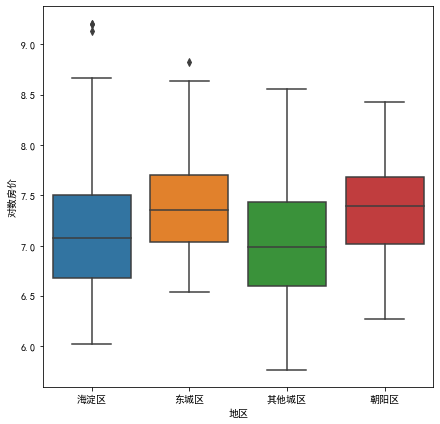

In [17]:
#酒店区域因素分析
plt.figure(figsize=(7,7))
sns.boxplot(x='地区',y='对数房价',data=df)

#根据地区划分的箱型图展示，其中，东城区和朝阳区的房价最高，海淀区紧随其后

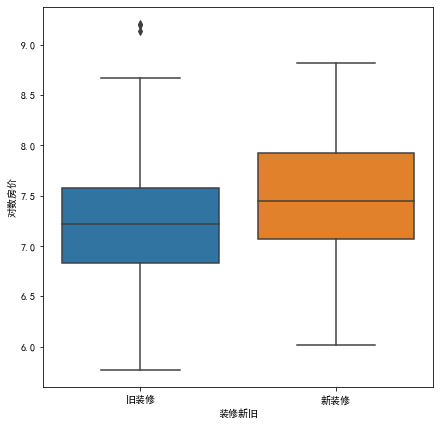

In [19]:
#酒店装修时间
df['对数房价']=np.log(df['房价'])
plt.figure(figsize=(7,7))
sns.boxplot(x='装修新旧',y='对数房价',data=df)

#新装修的价格高于就旧装修，并且价格差异明显。

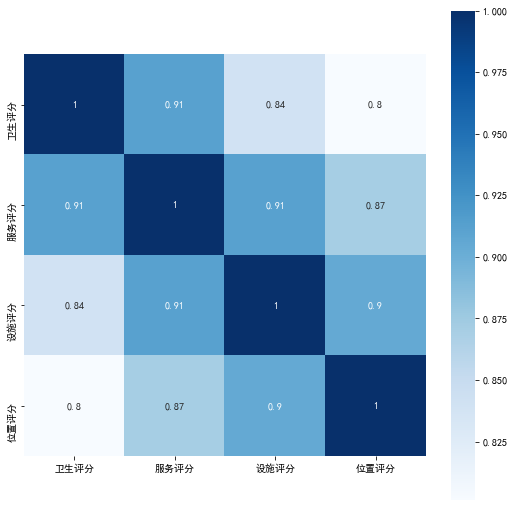

In [20]:
#评分因素相关系数

grade=pd.DataFrame([df['卫生评分'],df['服务评分'],df['设施评分'],df['位置评分']]).transpose()
correlation=grade.corr()
plt.subplots(figsize=(9,9))
sns.heatmap(correlation,annot=True,vmax=1,square=True,cmap='Blues')

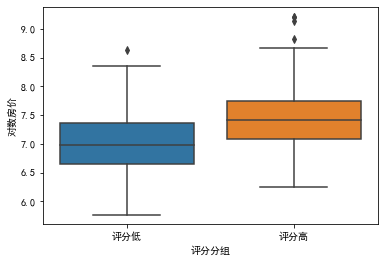

In [21]:
#评分因素箱型图
df['评分分组']=pd.cut(df['总体评分'],[0,4.5,5.0],labels=['评分低','评分高'])
sns.boxplot(x='评分分组',y='对数房价',data=df)

#评分高的房价高于评分低的房价

In [22]:
#特征选择与处理
features=['地区','房间类型','装修新旧','总体评分','校园生活','公司','出行住宿']
X=df[features]
X['地区']=pd.get_dummies(X['地区'])
X['房间类型']=pd.get_dummies(X['房间类型'])
X['装修新旧']=pd.get_dummies(X['装修新旧'])

# 对特征进行归一化处理
from sklearn import preprocessing
X['总体评分']=preprocessing.scale(X['总体评分'])
X['校园生活']=preprocessing.scale(X['校园生活'])
X['公司']=preprocessing.scale(X['公司'])
X['出行住宿']=preprocessing.scale(X['出行住宿'])

In [24]:
#随机抽取10行查看
X.sample(10)

,地区,房间类型,装修新旧,总体评分,校园生活,公司,出行住宿
178,0,0,1,-1.846438,-0.795443,-1.004400,-1.233213
333,0,0,0,0.719773,-0.795443,-1.004400,-1.233213
421,0,0,1,-0.360737,3.144145,0.034803,-0.334100
251,1,1,1,0.584709,0.581500,0.393150,1.186459
403,0,1,1,-0.495800,-0.298214,-0.646054,0.089012
203,0,0,1,0.179518,1.346468,-0.287708,-0.082877
20,0,0,1,0.314582,1.116978,0.966503,0.049346
247,1,1,1,-0.225673,-0.221717,1.181511,0.538569
265,0,0,1,0.449646,0.352009,0.178142,0.287346
121,0,0,1,1.395092,-0.030475,-0.144370,0.366680


In [25]:
#模型拟合
from sklearn import linear_model
from sklearn.model_selection import train_test_split
model=linear_model.LinearRegression()
y=df['房价']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
# 计算残差
np.mean(abs(model.predict(X_test)-y_test))

734.3432022762347

In [27]:
import statsmodels.api as sm
est=sm.OLS(y,X).fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:                     房价   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.639
Method:                 Least Squares   F-statistic:                              141.8
Date:                Wed, 09 Sep 2020   Prob (F-statistic):                   1.00e-118
Time:                        13:15:38   Log-Likelihood:                         -4729.1
No. Observations:                 556   AIC:                                      9472.
Df Residuals:                     549   BIC:                                      9502.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------